In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.ensemble import RandomForestClassifier


In [3]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images


In [4]:
forests = load_images_from_folder("../data/ImagesGoogleMapsForests")

In [5]:
orchards = load_images_from_folder("../data/ImagesGoogleMapsOrchards")

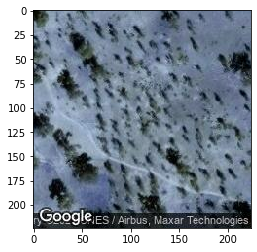

In [6]:
plt.imshow(forests[0])

In [7]:
split = 0.7

random.shuffle(forests)
forests_train = forests[:int(split*len(forests))]
forests_test = forests[int(split*len(forests)):]

random.shuffle(orchards)
orchards_train = orchards[:int(split*len(orchards))]
orchards_test = orchards[int(split*len(orchards)):]

In [64]:
forests_train_fft = np.fft.fft2(forests_train).real.reshape(-1, 224*224*3)
forests_test_fft = np.fft.fft2(forests_test).real.reshape(-1, 224*224*3)
orchards_train_fft = np.fft.fft2(orchards_train).real.reshape(-1, 224*224*3)
orchards_test_fft = np.fft.fft2(orchards_test).real.reshape(-1, 224*224*3)

In [65]:
f_train_mean = np.mean(forests_train_fft, 1, keepdims=True)
f_train_std = np.std(forests_train_fft, 1, keepdims=True)
o_train_mean = np.mean(orchards_train_fft, 1, keepdims=True)
o_train_std = np.std(orchards_train_fft, 1, keepdims=True)
f_test_mean = np.mean(forests_test_fft, 1, keepdims=True)
f_test_std = np.std(forests_test_fft, 1, keepdims=True)
o_test_mean = np.mean(orchards_test_fft, 1, keepdims=True)
o_test_std = np.std(orchards_test_fft, 1, keepdims=True)

In [66]:
forests_train_fft = np.concatenate([f_train_mean, f_train_std],1)
forests_test_fft = np.concatenate([f_test_mean, f_test_std],1)
orchards_train_fft = np.concatenate([o_train_mean, o_train_std],1)
orchards_test_fft = np.concatenate([o_test_mean, o_test_std],1)

In [67]:
train_forests_label = np.zeros(forests_train_fft.shape[0])
test_forests_label = np.zeros(forests_test_fft.shape[0])
train_orchards_label = np.ones(orchards_train_fft.shape[0])
test_orchards_label = np.ones(orchards_test_fft.shape[0])

In [68]:
train_data = np.concatenate([forests_train_fft, orchards_train_fft])
test_data = np.concatenate([forests_test_fft, orchards_test_fft])
train_labels = np.concatenate([train_forests_label, train_orchards_label])
test_labels = np.concatenate([test_forests_label, test_orchards_label])

def randomize(test_list1, test_list2):
    temp = list(zip(test_list1, test_list2))
    random.shuffle(temp)
    res1, res2 = zip(*temp)
    return res1, res2

train_data, train_labels = randomize(train_data, train_labels)
test_data, test_labels = randomize(test_data, test_labels)


In [11]:
fft = np.fft.fft2(forests_train).real

In [13]:
fft.shape

(1682, 224, 224, 3)

In [69]:
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(np.array(train_data), np.array(train_labels))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
ypred = model.predict(test_data)

In [71]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_labels, ypred))
print("F1:",metrics.f1_score(test_labels, ypred))

Accuracy: 0.5439005439005439
F1: 0.4529356943150047


In [35]:
2403/(1886+2403)
224*224*3

150528

Text(0, 0.5, 'Amplitude')

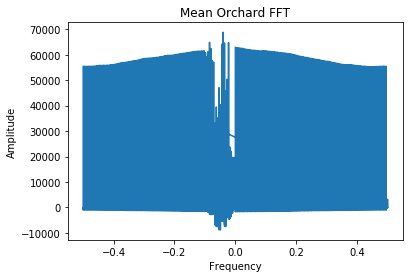

In [75]:
plt.plot(np.fft.fftfreq(224*224*3), np.fft.fft2(np.mean(orchards_train, 0)).real.flatten())
plt.title("Mean Orchard FFT")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

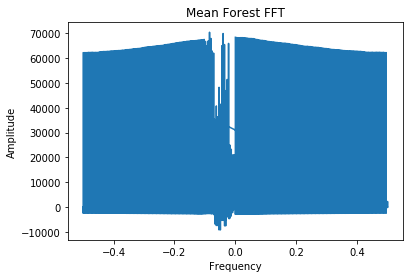

In [76]:
plt.plot(np.fft.fftfreq(224*224*3), np.fft.fft2(np.mean(forests_train, 0)).real.flatten())
plt.title("Mean Forest FFT")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

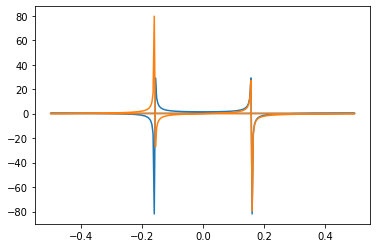

In [22]:
import matplotlib.pyplot as plt
t = np.arange(256)
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

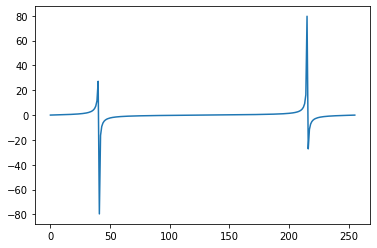

In [32]:
plt.plot(sp.imag)

In [8]:
forests_train_fft = [[np.fft.fft2(i).real.flatten(), 'forest'] for i in forests_train]
forests_test_fft = [[np.fft.fft2(i).real.flatten(), 'forest'] for i in forests_test]
orchards_train_fft = [[np.fft.fft2(i).real.flatten(), 'orchard'] for i in orchards_train]
orchards_test_fft = [[np.fft.fft2(i).flatten().real, 'orchard'] for i in orchards_test]